In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('players_22.csv', low_memory=False)
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]
df['player_positions']=df['player_positions'].str.split(',',expand=True)[0]

df.dropna(inplace=True)

##### 1. FILTRANDO A EQUIPOS DE LA PREMIER LEAGUE

In [4]:
teams_premier_league=['Arsenal','Manchester City','Manchester United','Liverpool','Chelsea','Everton', 'Burnley'
                      ,'Aston Villa','Luton Town','Tottenham Hotspur','Wolverhampton Wanderers','West Ham United',
                      'Brentford','Fulham','Brighton & Hove Albion','Newcastle United','Crystal Palace','Nottingham Forest'
                      ,'AFC Bournemouth','Sheffield United']
df=df[df['club_name'].isin(teams_premier_league)]

In [5]:
df.sort_values(by=['overall','potential','value_eur'],ascending=False,inplace=True)

##### 2. DISTRUBUCION POR PUNTAJE DE JUGADORES

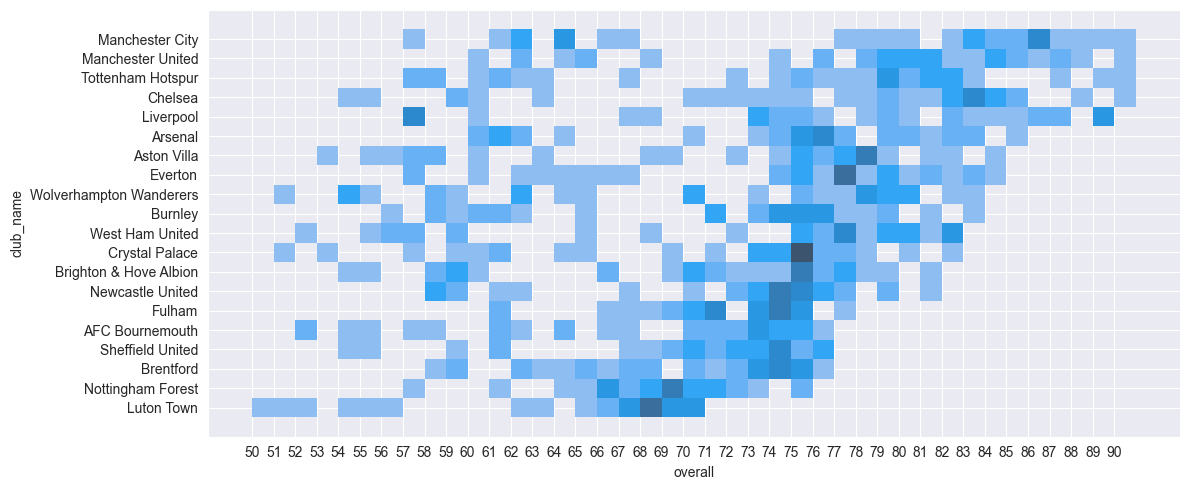

In [6]:
import numpy as np
fig,ax=plt.subplots(figsize=(12,5),tight_layout=True)
sns.histplot(df,x='overall',y='club_name',binwidth=1)
bins=np.arange(df['overall'].min(),df['overall'].max(),1)
plt.xticks(bins)
plt.show()

##### 3. DREAM TEAM PREMIER LEAGUE

In [7]:
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
10,N. Kanté,30,France,90,90,Chelsea,100000000.0,230000.0,CDM
18,Ederson,27,Brazil,89,91,Manchester City,94000000.0,200000.0,GK
13,H. Son,28,Korea Republic,89,89,Tottenham Hotspur,104000000.0,220000.0,LM
16,S. Mané,29,Senegal,89,89,Liverpool,101000000.0,270000.0,LW
17,M. Salah,29,Egypt,89,89,Liverpool,101000000.0,270000.0,RW
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB


##### 4. MEJOR JUGADOR POR EQUIPO

In [8]:
df_best_player=df.copy()
df_best_player=df_best_player.drop_duplicates("club_name").reset_index()

In [9]:
df_best_player

,index,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
1,2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
2,9,H. Kane,27,England,90,90,Tottenham Hotspur,129500000.0,240000.0,ST
3,10,N. Kanté,30,France,90,90,Chelsea,100000000.0,230000.0,CDM
4,20,Alisson,28,Brazil,89,90,Liverpool,82000000.0,190000.0,GK
5,81,P. Aubameyang,32,Gabon,85,85,Arsenal,43500000.0,145000.0,ST
6,113,E. Martínez,28,Argentina,84,85,Aston Villa,33500000.0,81000.0,GK
7,111,L. Digne,27,France,84,84,Everton,40500000.0,110000.0,LB
8,168,R. Jiménez,30,Mexico,83,83,Wolverhampton Wanderers,35500000.0,120000.0,ST
9,167,N. Pope,29,England,83,83,Burnley,25000000.0,45000.0,GK


C:\Users\Asus\AppData\Local\Temp\ipykernel_20376\2326112094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_best_player,x='overall',y='short_name',palette=sns.color_palette('mako'),width=0.5)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20376\2326112094.py:3: UserWarning: 
The palette list has fewer values (6) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(df_best_player,x='overall',y='short_name',palette=sns.color_palette('mako'),width=0.5)


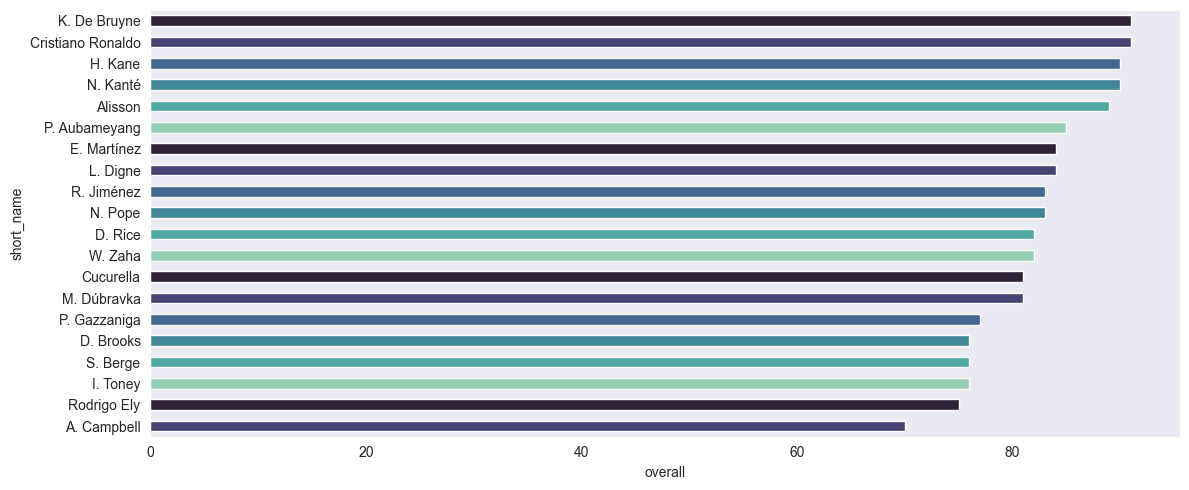

In [10]:
sns.set_style('dark')
fig,ax=plt.subplots(figsize=(12,5),tight_layout=True)
sns.barplot(df_best_player,x='overall',y='short_name',palette=sns.color_palette('mako'),width=0.5)
plt.show()

##### 5. MEJOR PLANTILLA

In [21]:
def best_team(team):
    df_squad=df.copy()
    df_squad=df_squad.groupby(['club_name','player_positions']).head(2) #el dos hace que escoja dos jugadores por equipo y posicion
    df_squad=df_squad[df_squad['club_name']==team].sort_values(by=['player_positions','overall','potential'],ascending=False)
    return df_squad

In [50]:
best_team('Everton')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
268,Richarlison,24,Brazil,82,87,Everton,46500000.0,100000.0,ST
354,D. Calvert-Lewin,24,England,81,85,Everton,37500000.0,90000.0,ST
310,J. Rodríguez,29,Colombia,81,81,Everton,25500000.0,105000.0,RW
974,A. Iwobi,25,Nigeria,77,79,Everton,13000000.0,68000.0,RM
911,A. Townsend,29,England,77,77,Everton,10500000.0,74000.0,RM
687,S. Coleman,32,Republic of Ireland,78,78,Everton,9500000.0,69000.0,RB
2199,J. Kenny,24,England,74,75,Everton,4800000.0,46000.0,RB
1735,D. Gray,25,England,75,78,Everton,7500000.0,66000.0,LW
8314,A. Gordon,20,England,67,81,Everton,2500000.0,16000.0,LM
111,L. Digne,27,France,84,84,Everton,40500000.0,110000.0,LB


In [51]:
avg_overall=[best_team(team)['overall'].mean() for team in teams_premier_league]
df_avg=pd.DataFrame({'Team':teams_premier_league, 'AVG':avg_overall})
df_avg=df_avg.dropna()
df_avg=df_avg.sort_values('AVG',ascending=False)
df_avg

,Team,AVG
1,Manchester City,83.550000
3,Liverpool,82.444444
2,Manchester United,82.300000
4,Chelsea,81.450000
9,Tottenham Hotspur,78.666667
5,Everton,78.368421
0,Arsenal,77.750000
11,West Ham United,76.631579
15,Newcastle United,74.684211
6,Burnley,74.550000


C:\Users\Asus\AppData\Local\Temp\ipykernel_20376\4120809566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_avg[:10],x='Team',y='AVG',palette=sns.color_palette('pastel'))


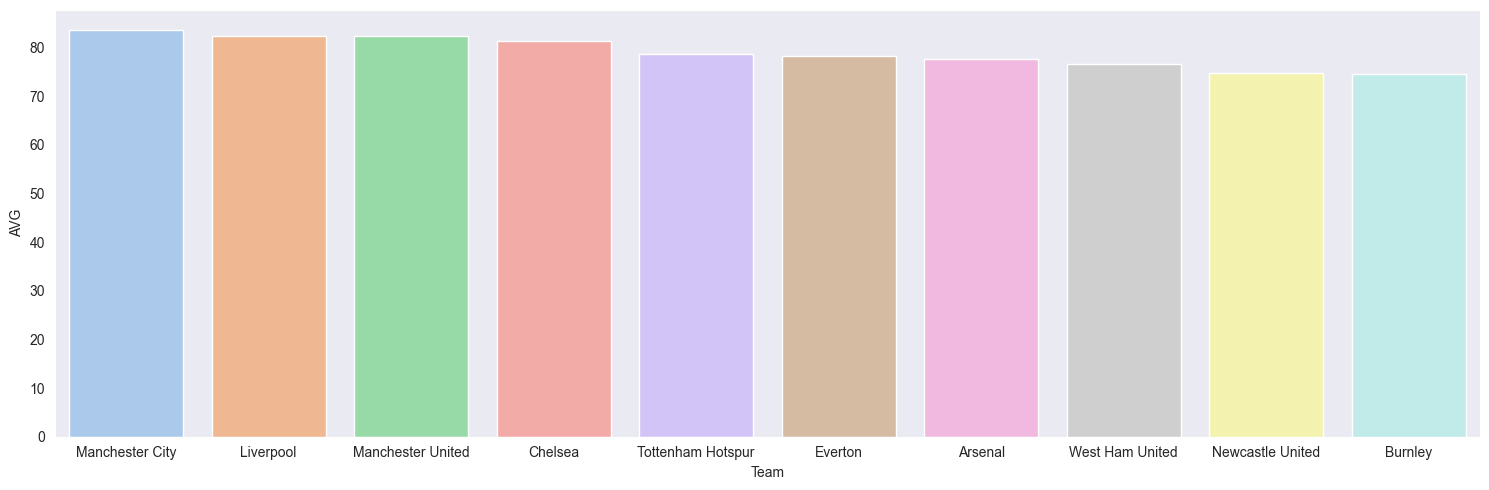

In [52]:
fig,ax=plt.subplots(figsize=(15,5),tight_layout=True)
sns.barplot(df_avg[:10],x='Team',y='AVG',palette=sns.color_palette('pastel'))
plt.show()

In [53]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [54]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup] #cuenta las veces que aparece un elemento en lineup y crea un array con esos valores

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count}) #crea un df con la posicion y el numero de veces que aparece
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values #filtra los valores de lineup menor o igual a 1
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values #filtra las mayores a 1 
    
    df_squad = best_team(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'nationality_name', 'player_positions']]

In [55]:
for index, row in df_avg[:9].iterrows():
    max_average = None
    for key, values in dict_formation.items():
        average = best_lineup(row['Team'], values)['overall'].mean() #saca la media de cada formacion del diccionario
        if max_average is None or average>max_average: #compara que formacion tiene mayor media
            max_average = average
            formation = key
    print(row['Team'], formation, max_average)


Manchester City 4-3-3 86.18181818181819
Liverpool 4-3-3 86.1
Manchester United 4-3-3 85.33333333333333
Chelsea 4-3-3 84.88888888888889
Tottenham Hotspur 4-3-3 82.66666666666667
Everton 4-2-3-1 80.55555555555556
Arsenal 4-3-3 80.44444444444444
West Ham United 4-2-3-1 80.2
Newcastle United 4-3-3 76.44444444444444


In [56]:
best_lineup('Everton', dict_formation['4-2-3-1'])


,short_name,overall,nationality_name,player_positions
268,Richarlison,82,Brazil,ST
687,S. Coleman,78,Republic of Ireland,RB
111,L. Digne,84,France,LB
169,J. Pickford,83,England,GK
161,Allan,83,Brazil,CDM
977,J. Gbamin,77,Côte d'Ivoire,CDM
441,M. Keane,80,England,CB
602,Y. Mina,79,Colombia,CB
521,G. Sigurðsson,79,Iceland,CAM
